<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Use Core ML model to predict Boston house prices</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/boston/images/boston_houseprice_banner.png" width="700" alt="Icon"> </th>
   </tr>
</table>

This notebook demonstrates how to perform regression analysis using `scikit-learn 0.20` and the `watson-machine-learning-client-V4` package.

Some familiarity with Python is helpful. This notebook is compatible with Watson Studio Desktop 1.1, Watson Machine Learning Server 2.0, and Python 3.6.

You will use the sample data set, **sklearn.datasets.load_boston** which is available in scikit-learn, to predict house prices.

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``
-  Explore data
-  Prepare data for training and evaluation
-  Create a scikit-learn pipeline
-  Train and evaluate a model
-  Store a model in the Watson Machine Learning (WML) repository
-  Deploy a model as Core ML


## Contents

1.	[Load and explore data](#load)  
1.1 [Explore Data](#dataset)  
1.2 [Check the correlations between predictors and the target](#corr)
2.	[Build a scikit-learn linear regression model](#model)  
2.1 [Split data](#prep)  
2.2 [Create a scikit-learn pipeline](#pipe)  
2.3 [Train the model](#train)  
3.	[Setting up](#setup)  
3.1 [Connecting to Watson Studio Desktop](#wsd)  
3.2 [Connecting to Watson Machine Learning Server](#wmls)  
4.	[Save the model](#save)  
5.	[Create a virtual deployment (WML Server only)](#deploy)  
5.1 [Create a virtual deployment for the model](#create)  
5.2 [Download the Core ML file from the deployment](#getdeploy)  
5.3 [Test the CoreML model](#testcoreML)  
5.4 [Delete the deployment and model](#delete)  
6.	[Summary and next steps](#summary)

To get started on Watson Machine Learning (WML) Server, find documentation on installion and set up <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-install-over.html" target="_blank" rel="noopener no referrer">here</a>.

-  Local python environment configurations:
  + Python 3.6
  + scikit-learn 0.20
  + watson-machine-learning-client-V4

<a id="load"></a>
## 1. Load and explore data

The sample data set contains boston house prices. The data set can be found <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/" target="_blank" rel="noopener no referrer">here</a>.

In this section, you will learn how to:
- [1.1 Explore Data](#dataset)  
- [1.2 Check the correlations between predictors and the target](#corr)

### 1.1 Explore data<a id="dataset"></a>

In this subsection, you will perform exploratory data analysis of the boston house prices data set.

<div class="alert alert-block alert-warning">
To simply hide the output of pip install, use <tt>-q</tt> after <tt>!pip install</tt>.
</div>

In [1]:
!pip install -q --upgrade scikit-learn==0.20.4

In [2]:
from sklearn import datasets
from pandas import DataFrame

boston_data = datasets.load_boston()

Let's check the names of the predictors.

In [3]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Tip:** Run `print(boston_data.DESCR)` to view a detailed description of the data set.

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Create a pandas DataFrame and display some descriptive statistics.

In [5]:
boston_pd = DataFrame(boston_data.data)
boston_pd.columns = boston_data.feature_names
boston_pd['PRICE'] = boston_data.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The describe method generates summary statistics of numerical predictors.

In [6]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.2 Check the correlations between predictors and the target <a id="corr"></a>

In this subsection, you will check the linear correlations between predictors and target by plotting a scatterplot matrix and a heatmap. You need the following packages in order to plot the scatterplot matrix and the heatmap:
* ``matplotlib``
* ``seaborn``

Pearson-type correlations - linear correlations - are excessively affected by outliers, unequal predictors, non-normality, and non-linearities. Hence, when plotting the correlation matrix, it's better to plot the scatterplot matrix first to check the outliers and then plot the heatmap of the correlation matrix.

First, let's plot the scatterplot matrix.

In [7]:
from matplotlib.pyplot import subplots
from seaborn import heatmap, pairplot, set

In [8]:
set(style='ticks')

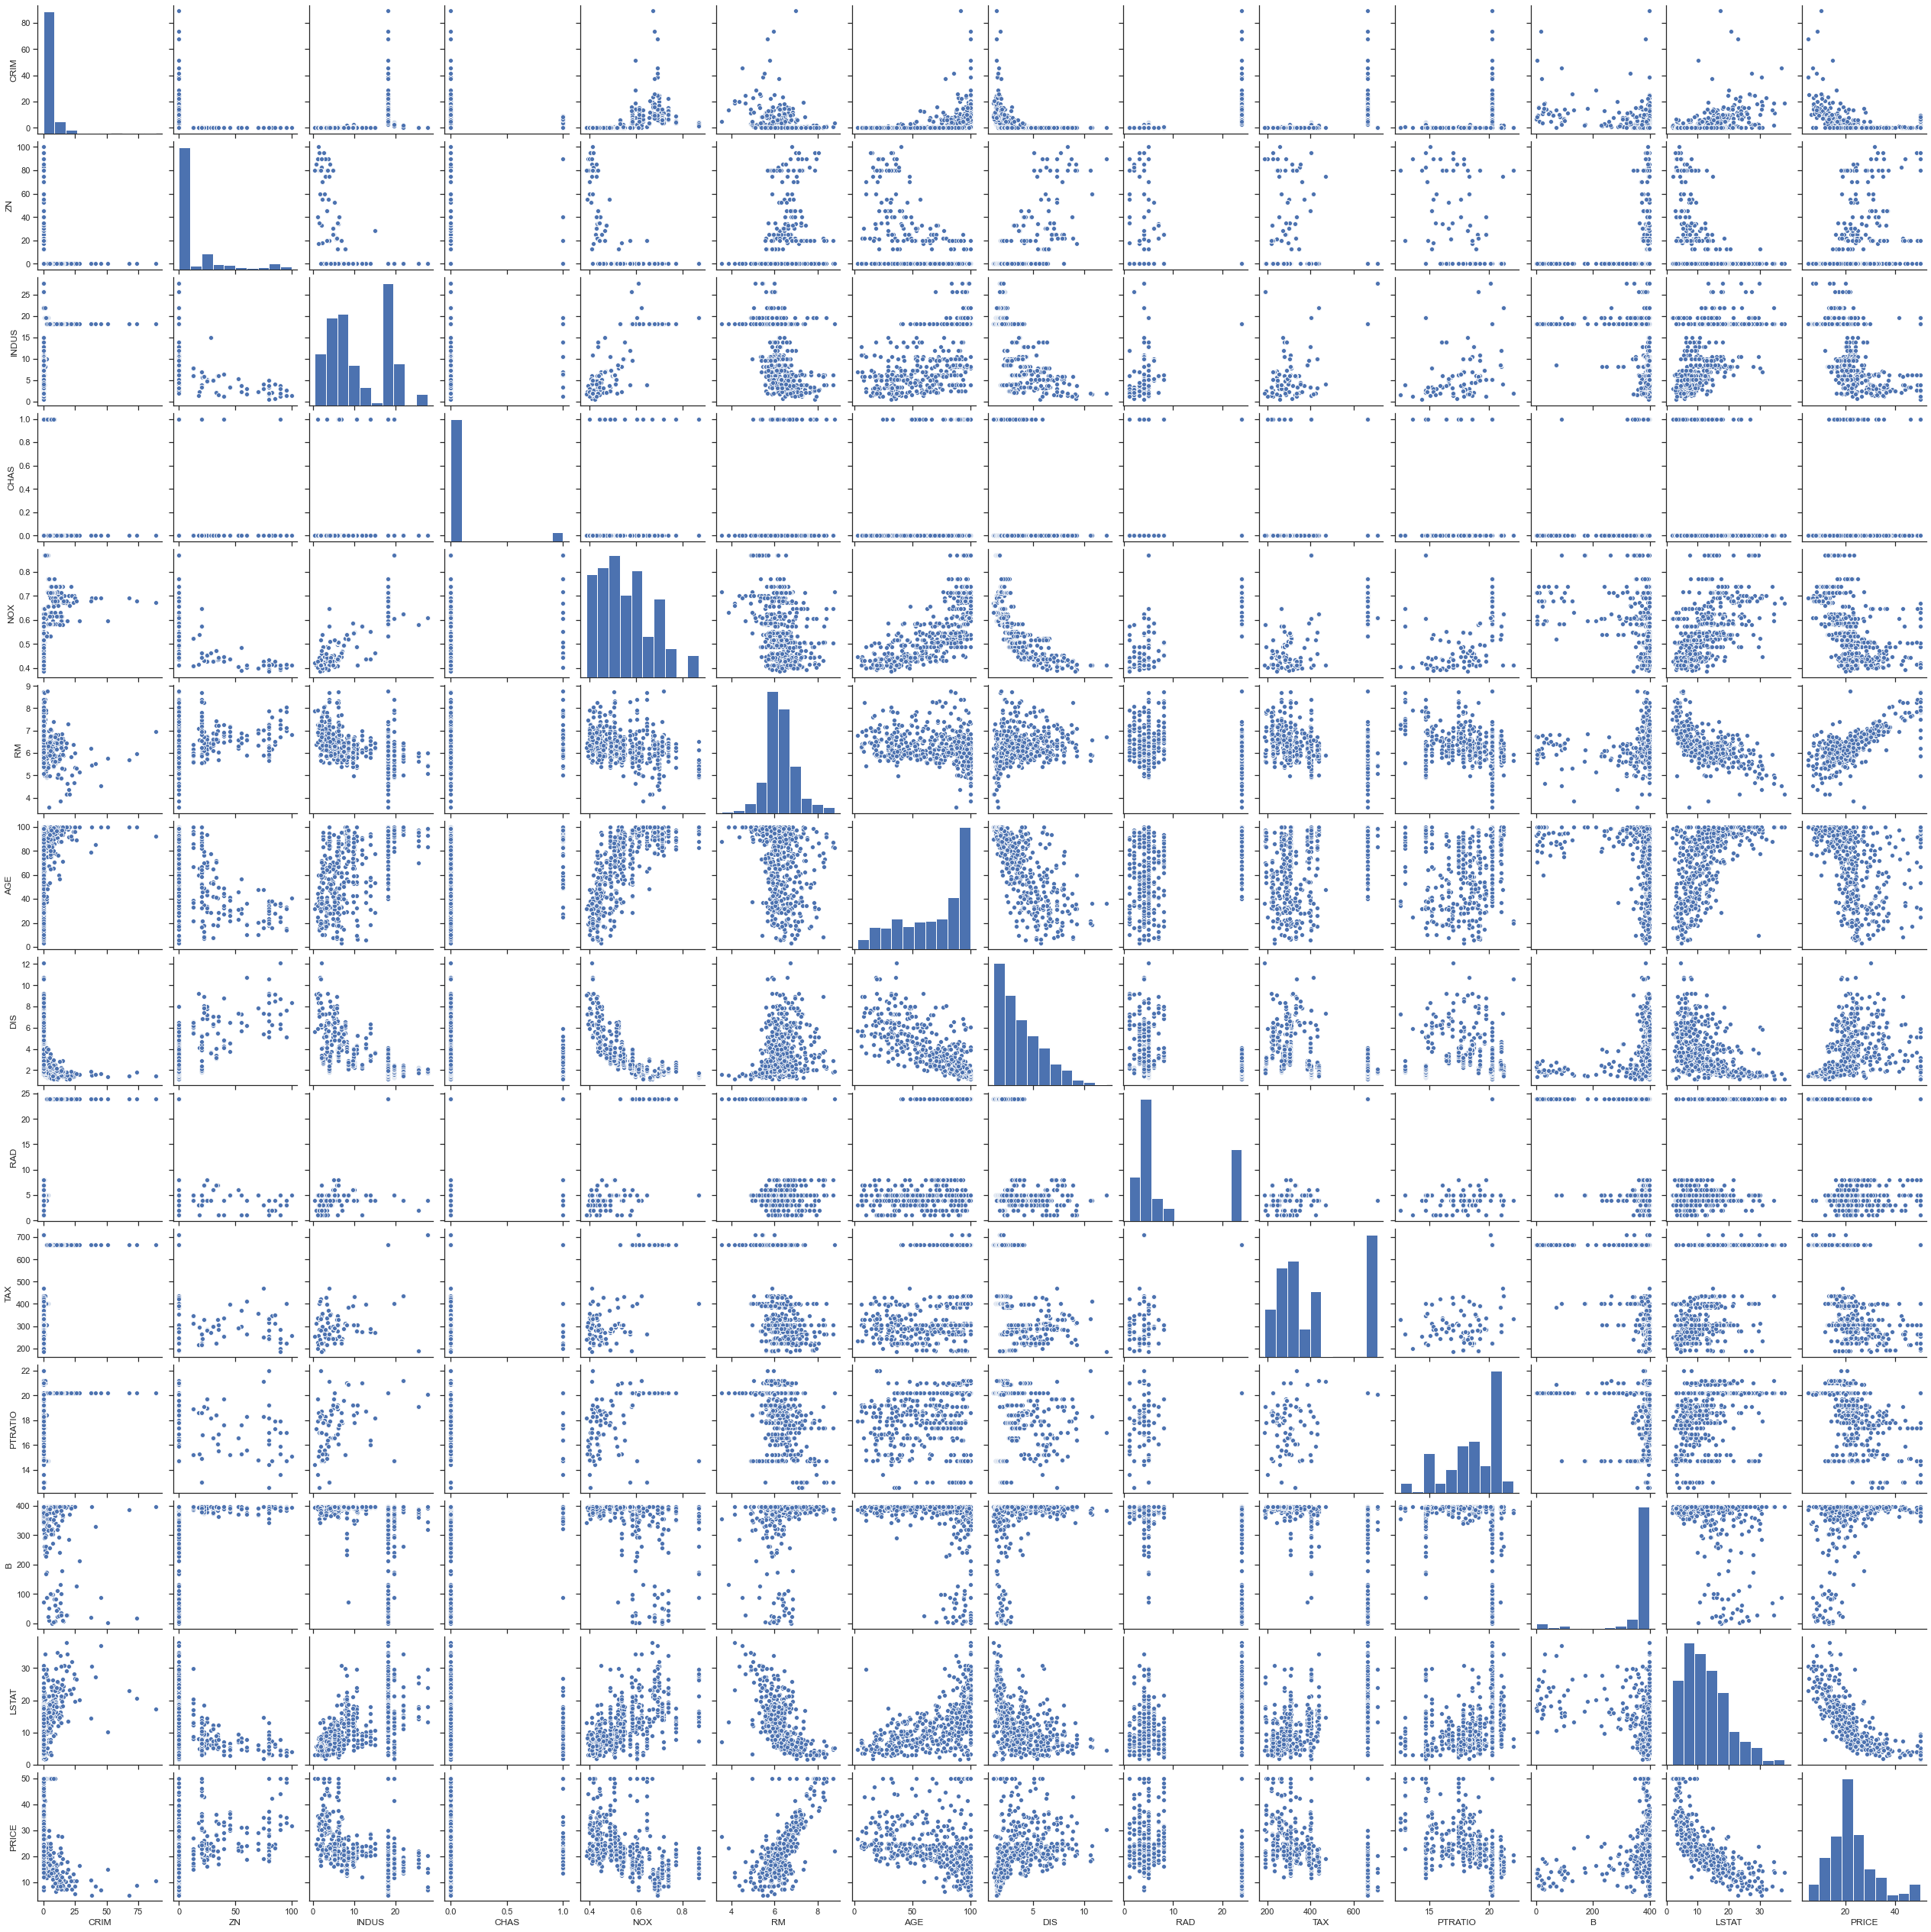

In [9]:
pairplot(boston_pd);

Second, the heatmap of correlation matrix.

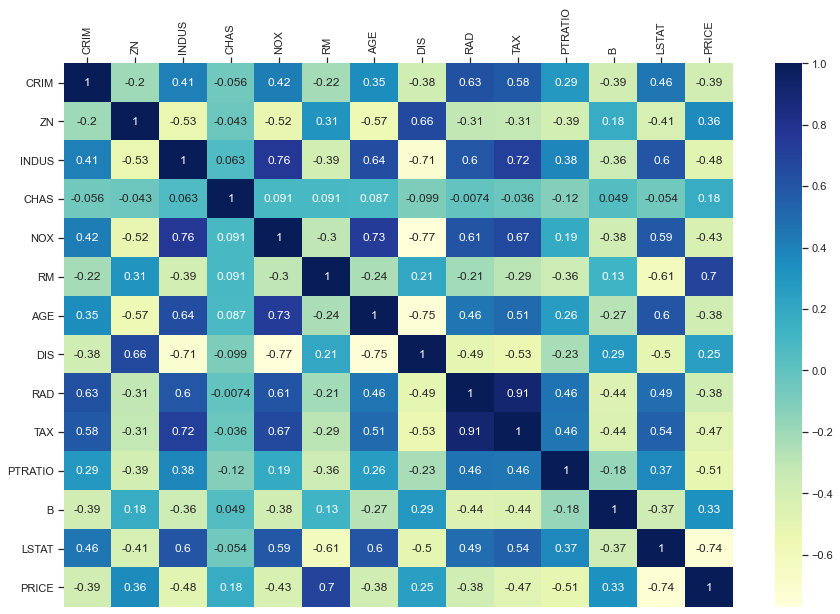

In [10]:
subplots(figsize=(15, 10))
hm = heatmap(boston_pd.corr(), annot=True, cmap='YlGnBu')
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
hm.xaxis.set_ticks_position('top')

From both plots, you can see that the predictor ``RM`` has strong correlation with the target ``PRICE``.

<a id="model"></a>
## 2. Build a scikit-learn linear regression model

In this section, you will learn how to:
- [2.1 Split data](#prep)
- [2.2 Create a scikit-learn pipeline](#pipe)
- [2.3 Train the model](#train)

### 2.1 Split data<a id="prep"></a>

In this subsection, you will split the data set into: 
- Train set
- Test set

In [11]:
# Split the data into two data sets.
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=5)

print('Number of training records: {}'.format(X_train.shape[0]))
print('Number of training records: {}'.format(X_test.shape[0]))

Number of training records: 339
Number of training records: 167


Your data has been successfully split into two sets: 

-  The train set, which is the largest group, is used for training.
-  The test set will be used for model evaluation and is used to test the model.

### 2.2 Create a scikit-learn pipeline<a id="pipe"></a>

In this subsection, you will create a scikit-learn pipeline.

First, import the scikit-learn machine learning packages that are needed in the subsequent steps.

In [12]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

Standardize the features by removing the mean and scaling to unit variance.

In [13]:
scaler = preprocessing.StandardScaler()

Next, define the regressor you want to use. This notebook uses the Linear Regression model.

In [14]:
lr = LinearRegression()

Build the pipeline. A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model).

In [15]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

### 2.3 Train the model<a id="train"></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [16]:
model = pipeline.fit(X_train, y_train)

Check the model quality.

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE: {:.2f}'.format(mse))

MSE: 28.53


Plot the scatter plot of prices vs. predicted prices.

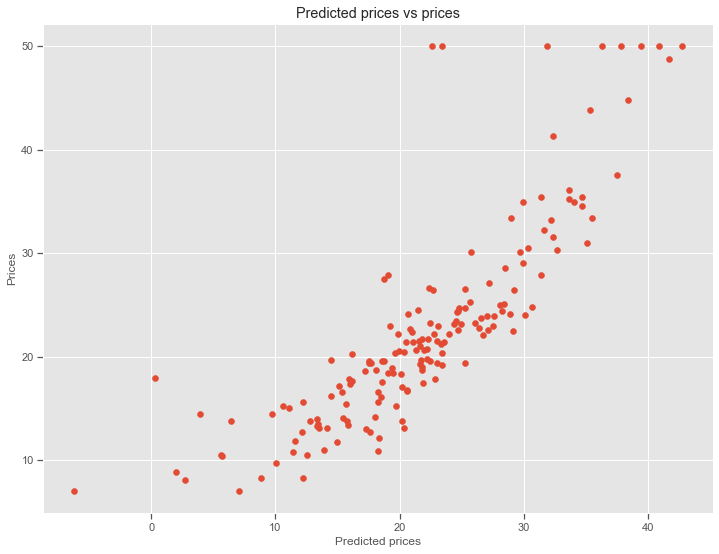

In [18]:
from matplotlib.pyplot import figure, scatter, style, title, xlabel, ylabel

style.use('ggplot')
figure(figsize=(12, 9))
title('Predicted prices vs prices')
ylabel('Prices')
xlabel('Predicted prices')
plot = scatter(y_pred, y_test)

**Note:** You can tune your model to achieve better accuracy. To keep this example simple, the tuning section is omitted.

<a id="setup"></a>
## 3. Setting up

In this section, you will learn how to use the python client to connect to both `Watson Studio Desktop (WSD)` and `Watson Machine Learning (WML) Server`. If you only intend to save the model on WSD, you will need to follow the steps in section [3.1 Connecting to Watson Studio Desktop](#wsd).

If you want to use the WML Server, you will need to refer to section [3.2 Connecting to Watson Machine Learning Server](#wmls). From there, you will be able to save, deploy, and score the model in your deployment space on the WML Server.

First, import the `watson-machine-learning-client` module and authenticate the service instance.

<div class="alert-block alert-info"><br>
    &nbsp;&nbsp;&nbsp;&nbsp;The <tt>watson-machine-learning-client</tt> documentation can be found <a href="https://wml-api-pyclient-dev-v4.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.<br><br>
</div>

In [19]:
!pip install -q --upgrade watson-machine-learning-client-V4

In [20]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

### 3.1 Connecting to Watson Studio Desktop <a id="wsd"></a>

To associate the python client with Watson Studio Desktop (WSD), use the following credentials.

In [21]:
from project_lib.utils import environment

url = environment.get_common_api_url()
wml_credentials = {
    'instance_id': 'wsd_local',
    'url': url,
    'version': '1.1'
}

Now, instantiate a `WatsonMachineLearningAPIClient` object.

In [22]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [23]:
client.version

'1.0.112'

In [24]:
from project_lib import Project

project = Project.access()
project_id = project.get_metadata()['metadata']['guid']
client.set.default_project(project_id)

'SUCCESS'

To proceed, you can go directly to section [4. Save the model](#save).

### 3.2 Connecting to Watson Machine Learning Server <a id="wmls"></a>

In this subsection, you will learn how to set up the Watson Machine learning (WML) Server that is required in order to save, deploy, and score the *Python function* in the Watson Machine Learning (WML) repository.

**Connect to the Watson Machine Learning (WML) Server using the Python client**

<div class="alert-block alert-info">
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;To install the Watson Machine Learning Server, follow <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-install-over.html" target="_blank" rel="noopener no referrer">these documentation steps</a>.<br><br>
    &nbsp;&nbsp;&nbsp;&nbsp;To connect to the WML server and find your authentication information (your credentials) follow the steps provided here in the <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/wmls-connect.html" target="_blank" rel="noopener no referrer">Documentation</a>.
    <br><br>
</div>

**Action**: Enter your WML Server credentials in the following cell.

In [25]:
# Enter your credentials here.
wml_credentials = {
    'url': '<URL>:31843',
    'username': '---',
    'password': '---',
    'instance_id': 'wml_local',
    'version': '2.0'
}

In [26]:
# @hidden_cell

wml_credentials = {
    'url': 'https://wmlserver-dev-test.ml.test.cloud.ibm.com:31843',
    'username': 'admin',
    'password': 'password',
    'instance_id': 'wml_local',
    'version': '2.0'
}

Now, instantiate a `WatsonMachineLearningAPIClient` object.

In [27]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [28]:
client.version

'1.0.112'

Since you are using WML Server in this section, you can obtain the space UID by using the following cells.

<div class="alert-block alert-info"><br>
&nbsp;&nbsp;&nbsp;&nbsp;You can create your own <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/analyze-data/ml-spaces_local.html" target="_blank" rel="noopener no referrer">deployment space</a> by selecting <b>Deployment Spaces</b> from the Navigation Menu on the top left of this page.<br><br></div>

Alternatively, you can create a deployment and obtain its UID using the code in the following cell.

In [29]:
# Obtain the UId of your space
def guid_from_space_name(client, space_name):
    instance_details = client.service_instance.get_details()
    space = client.spaces.get_details()
    return (next(item for item in space['resources']
                 if item['entity']['name'] == space_name)['metadata']['guid'])

**Action:** Enter the name of your deployment space in the code below: `space_uid = guid_from_space_name(client, 'YOUR_DEPLOYMENT_SPACE')`.

In [30]:
# Enter the name of your deployment space here:
space_uid = guid_from_space_name(client, 'YOUR_DEPLOYMENT_SPACE')
print('Space UID = {}'.format(space_uid))

Space UID = 3ce5e796-f127-431a-9609-46456e10d274


Setting the default space is mandatory for WML Server. You can set this using the cell below.

In [31]:
client.set.default_space(space_uid)

'SUCCESS'

## 4. Save the model<a id="save"></a>

First, you need to create the model metadata.

In [32]:
software_spec_uid = client.software_specifications.get_uid_by_name(
    'scikit-learn_0.20-py3.6')

model_metadata = {
    client.repository.ModelMetaNames.NAME: 'Boston house price prediction',
    client.repository.ModelMetaNames.DESCRIPTION: 'My CoreML Model',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.20'
}

Store the model and can extract the model UID from the saved model details.

In [33]:
published_model = client.repository.store_model(model=model,
                                                meta_props=model_metadata,
                                                training_data=X_train,
                                                training_target=y_train)

In [34]:
model_uid = client.repository.get_model_uid(published_model)
print('Model UID = {}'.format(model_uid))

Model UID = 18d60dfe-b1b2-4261-849f-4c672aa8290f


Get the saved model metadata from WML using the model UID.

In [35]:
from json import dumps

# Details about the model.
model_details = client.repository.get_details(model_uid)
print(dumps(model_details, indent=4))

{
    "metadata": {
        "name": "Boston house price prediction",
        "guid": "18d60dfe-b1b2-4261-849f-4c672aa8290f",
        "description": "My CoreML Model",
        "id": "18d60dfe-b1b2-4261-849f-4c672aa8290f",
        "modified_at": "2020-08-28T16:25:26.002Z",
        "created_at": "2020-08-28T16:25:25.002Z",
        "owner": "1000330999",
        "href": "/v4/models/18d60dfe-b1b2-4261-849f-4c672aa8290f?space_id=3ce5e796-f127-431a-9609-46456e10d274",
        "space_id": "3ce5e796-f127-431a-9609-46456e10d274"
    },
    "entity": {
        "name": "Boston house price prediction",
        "description": "My CoreML Model",
        "training_data_references": [
            {
                "location": {
                    "bucket": "not_applicable"
                },
                "type": "fs",
                "connection": {
                    "access_key_id": "not_applicable",
                    "secret_access_key": "not_applicable",
                    "endpoint_url": "

You can list all stored models using the `list_models` method.

In [36]:
client.repository.list_models()

------------------------------------  -----------------------------  ------------------------  -----------------
GUID                                  NAME                           CREATED                   TYPE
18d60dfe-b1b2-4261-849f-4c672aa8290f  Boston house price prediction  2020-08-28T16:25:25.002Z  scikit-learn_0.20
------------------------------------  -----------------------------  ------------------------  -----------------


<div class="alert-block alert-info"><br>
&nbsp;&nbsp;&nbsp;&nbsp;From the list of stored models, you can see that model is successfully saved. <br>

&nbsp;&nbsp;&nbsp;&nbsp;With Watson Studio Desktop credentials, this means you have saved the model in your project.<br>&nbsp;&nbsp;&nbsp;&nbsp;You can see the saved model in your project UI by clicking on your project name in the breadcrumb at the top of the application. <br>

&nbsp;&nbsp;&nbsp;&nbsp;With WML Server credentials, this means that you have saved the model in your deployment space.<br>&nbsp;&nbsp;&nbsp;&nbsp;You can view your model by selecting <b>Deployment Spaces</b> from the Navigation Menu and clicking on your deployment space name.<br>
<br></div>

If you are using WML Server, proceed to section [5. Create a virtual deployment (WML Server only)](#deploy). If you are using Watson Studio Desktop, you may skip to the [summary](#summary).

<a id="deploy"></a>
## 5. Create a virtual deployment (WML Server only)

In this section, you will learn how to use the WML client to create a **virtual** deployment via the `Core ML`. You will also learn how to use `download_url` to download a Core ML model to your <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> project.

- [5.1 Create a virtual deployment for the model](#create)
- [5.2 Download the Core ML file from the deployment](#getdeploy)
- [5.3 Test the CoreML model](#testcoreML)
- [5.4 Delete the deployment and model](#delete)

### 5.1 Create a virtual deployment for the model<a id="create"></a>

You will create deployment metadata and use the model UID obtained in the previous section.

In [37]:
# Deployment metadata.
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME:
    'Virtual deployment of Boston model',
    client.deployments.ConfigurationMetaNames.DESCRIPTION:
    'My Virtual Deployment',
    client.deployments.ConfigurationMetaNames.VIRTUAL: {
        'export_format': 'coreml'
    }
}

Deploy the model to the deployment space.

In [38]:
deployment_details = client.deployments.create(model_uid,
                                               meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '18d60dfe-b1b2-4261-849f-4c672aa8290f' started

#######################################################################################


initializing..
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5094b22f-cbe4-4666-b280-5a8dd2642a5d'
------------------------------------------------------------------------------------------------




In [39]:
client.deployments.list()

------------------------------------  ----------------------------------  -----  ------------------------  -------------
GUID                                  NAME                                STATE  CREATED                   ARTIFACT_TYPE
5094b22f-cbe4-4666-b280-5a8dd2642a5d  Virtual deployment of Boston model  ready  2020-08-28T16:25:29.339Z  model
------------------------------------  ----------------------------------  -----  ------------------------  -------------


<div class="alert-block alert-info">
    <br>&nbsp;&nbsp;&nbsp;&nbsp;From the list of deployed models in the deployment space, you can see that model was successfully created.<br><br>
</div>

Now, you can check details of your deployments.

In [40]:
# Deployment UID.
deployment_uid = client.deployments.get_uid(deployment_details)
print('Deployment UID = {}'.format(deployment_uid))

Deployment UID = 5094b22f-cbe4-4666-b280-5a8dd2642a5d


You can check the deployment details by running the following cell.

In [41]:
# Deployment details.
print(dumps(client.deployments.get_details(deployment_uid), indent=4))

{
    "entity": {
        "asset": {
            "href": "/v4/models/18d60dfe-b1b2-4261-849f-4c672aa8290f?space_id=3ce5e796-f127-431a-9609-46456e10d274",
            "id": "18d60dfe-b1b2-4261-849f-4c672aa8290f"
        },
        "custom": {},
        "description": "My Virtual Deployment",
        "name": "Virtual deployment of Boston model",
        "space": {
            "href": "/v4/spaces/3ce5e796-f127-431a-9609-46456e10d274",
            "id": "3ce5e796-f127-431a-9609-46456e10d274"
        },
        "space_id": "3ce5e796-f127-431a-9609-46456e10d274",
        "status": {
            "state": "ready",
            "virtual_deployment_downloads": [
                {
                    "url": "https://wmlserver-dev-test.ml.test.cloud.ibm.com:31843/v4/models/18d60dfe-b1b2-4261-849f-4c672aa8290f/content?space_id=3ce5e796-f127-431a-9609-46456e10d274&format=coreML"
                }
            ]
        },
        "virtual": {
            "export_format": "coreml"
        }
    },
    

### 5.2 Download the `Core ML` file from the deployment<a id="getdeploy"></a>

Download the virtual deployment content: Core ML model.

In [42]:
deployment_content = client.deployments.download(deployment_uid)
# deployment_url = deployment_details['entity']['status'][
#     'virtual_deployment_downloads'][0]['url']



----------------------------------------------------------
Successfully downloaded deployment file: mlartifact.tar.gz
----------------------------------------------------------




Use the code in the cell below to create the download link.

In [43]:
from watson_machine_learning_client.utils import create_download_link

create_download_link(deployment_content)

**Note:** You can use <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> to preview the model's metadata (after unzipping). 

### 5.3 Test the `Core ML` model<a id="testcoreML"></a>

Use the following steps to run a test against the downloaded Core ML model.

In [44]:
!pip install -q --upgrade coremltools

Use the ``coremltools`` to load the model and check some basic metadata.

First, extract the model.

In [45]:
from watson_machine_learning_client.utils import extract_mlmodel_from_archive

extracted_model_path = extract_mlmodel_from_archive('mlartifact.tar.gz',
                                                    model_uid)

Load the model and check the description.

In [46]:
import coremltools

loaded_model = coremltools.models.MLModel(extracted_model_path)
print(loaded_model.short_description)

'description'


The model looks good and can be used on your iPhone now.

### 5.4 Delete the deployment and model<a id='delete'></a>

Use the following method to delete the deployment.

In [47]:
client.deployments.delete(deployment_uid)

'SUCCESS'

In [48]:
client.deployments.list()

----  ----  -----  -------  -------------
GUID  NAME  STATE  CREATED  ARTIFACT_TYPE
----  ----  -----  -------  -------------


You can delete the model as well by running the following cell.

In [49]:
client.repository.delete(model_uid)

'SUCCESS'

You can check that your model was deleted by generating a list of your saved models.

In [50]:
client.repository.list_models()

----  ----  -------  ----
GUID  NAME  CREATED  TYPE
----  ----  -------  ----


<a id="summary"></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to build a scikit-learn model and a Core ML model. Also, you learned how to save the scikit-learn model both on Watson Studio Desktop and Watson Machine Learning Server. You can virtually deploy the scikit-learn model via Core ML to the WML Server, download the Core ML model from the WML Server, and port the Core ML model via Xcode to your iPhone as well.

If you are interested in sample swift application (for iOS), please visit <a href="https://github.com/pmservice/go-digits" target="_blank" rel="noopener no referrer">here</a>. 


### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success">

<h4>IBM documentation</h4>
<br>
 <li> <a href="https://wml-api-pyclient-dev-v4.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SS3PWM_1.0.0/wsj/wmls/overview.html" target="_blank" rel="noopener noreferrer">Watson Machine Learning Server</a></li>
 
<h4> IBM Samples</h4>
<br>
 <li> <a href="https://github.com/IBMDataScience/sample-notebooks" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
 <li> <a href="https://github.com/pmservice/wml-sample-models" target="_blank" rel="noopener noreferrer">Sample models</a></li>
 
<h4> Others</h4>
<br>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 <li> <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank" rel="noopener noreferrer">Pandas DataFrame</a></li>
 <li> <a href="https://seaborn.pydata.org" target="_blank" rel="noopener noreferrer">Seaborn</a></li>
</div>

### Authors

**Lukasz Cmielowski**, Ph.D., is a Lead Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who contributes to Watson Studio to democratize data science.

Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>